In [ ]:
"""
# Import comet_ml 
from comet_ml import Experiment

"""

In [ ]:
"""
#Setting the API key to create an experiment(saved as environment variable)
experiment = Experiment(
    api_key="D3gjozA5HT295wCeKSHce09F8",
  project_name="general",
    workspace="ereshiagabier",
)
"""

**This project entails the use of [Comet](https://www.comet.com/site/), a machine learning platform to aid in version control through the process of analysing and testing our models.** 

<div class="alert alert-block alert-info">
For <b>Comet</b> to be executed within this notebook, its' codes are placed on top of the notebook (see code blocks above). The code lines are as follows:
    
1. Importing of the Comet library.
2. Setting up of an environment variable in which the experiments will run in.
</div>


---

<h1><center>Twitter Sentiment Classification Analysis</center></h1>
<img src="final_image.png" style="width:850px;height:250px;">
<p style='text-align: center; margin-right: 3em; font-family: Serif;'> 
<font     size="1"
          face="arial"
          color="#808080">
          Source: Tibico, 2022
    </font></p>

## Table of Contents
* [1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Supervision Machine Learning](#sub_section_1_1_1)
        * [1.1.2 Project Components](#sub_section_1_1_2)
    * [1.2 Problem Statement](#section_1_2)
    * [1.3 Objectives](#section_1_3)
    
* [2. Importing Packages](#chapter2)

* [3. Loading Data](#chapter3)

* [4. Exploratory Data Analysis](#chapter4)
    * [4.1 Basic Analysis](#section_4_1)
    * [4.2 Target variable, Sentiment's distribution](#section_4_2)
    * [4.3 Top Hashtags](#section_4_3)
    * [4.4 Sentiments' Frequent Hashtags](#section_4_4)
    * [4.5 Tweet length per class](#section_4_5)
    * [4.6 Dataframe's WordCloud ](#section_4_6)

* [5. Data Engineering](#chapter5)
    * [5.1 Remove Punctuations and set to Lowercase](#section_5_1)
    * [5.2 Remove Hashtags](#section_5_2)
    * [5.3 Remove Username Handles](#section_5_3)
    * [5.4 Remove Weblinks](#section_5_4)
    * [5.5 Remove Stopwords](#section_5_5)
    * [5.6 Remove Numbers](#section_5_6)
    * [5.7 Tokenization](#section_5_7)
    * [5.8 Apply Lemmatization ](#section_5_8)
    * [5.9 Data Visualisation](#section_5_9)
        * [5.9.1 Dataframes' Top Words](#sub_section_5_9_1)
        * [5.9.2 Sentiments' Frequent Words](#sub_section_5_9_2)
    * [5.10 Preprocessing ](#section_5_10)
        * [5.10.1 Data Splitting](#sub_section_5_10_1)
        * [5.10.2 Vectorization](#sub_section_5_10_2)   
            * [5.10.2.1 Term Frequency–Inverse Document Frequency (TF-IDF)](#sub_section_5_10_2_1)
        * [5.10.3 Resampling](#sub_section_5_10_3)  
            * [5.10.3.1 Oversampling](#sub_section_5_10_3_1)
            * [5.10.3.2 Synthetic Minority Over-sampling Technique (SMOTE)](#sub_section_5_10_3_2)
            * [5.10.3.3 Undersampling](#sub_section_5_10_3_3)
* [6. Classification Models](#chapter6)
    * [6.1 Logistic Regression ](#section_6_1)
    * [6.2 Naive Bayes ](#section_6_2)
    * [6.3 Random Forest ](#section_6_3)
    * [6.4 Support Vector Classfier (SVC) ](#section_6_4)
    * [6.5 K-nearest Neighbors ](#section_6_5)
   
* [7. Model Performance](#chapter7)

* [8. Hyperparameter Tuning of Chosen Model](#chapter8)

* [9. Run Comet Experiment](#chapter9)

* [10. Apply Model of Test Dataset](#chapter10)

* [11. Chosen Model Explanation](#chapter11)

* [12. Conclusion](#chapter12)

* [13. Pickle Code](#chapter13)

* [14. References](#chapter14)

---

## 1. Predict Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

The concept of 'Big data' analytics resides within complex computer infrastructures, large data volumes and the increase in speed in which data is generated. In this era of 'Big data', there are also numerous data types such as documents, messages, emails, video/audio etc - in structured and unstructured forms. For example, social media feeds host a wealth of information, and that with the use of Natural Language Processing (NLP) and machine learning could generate tons of insights.

The popular social media platform, Twitter, is a rich source of information of which text analytics can be applied to. The sentiments within a text of a tweet could aid in decision making for interested parties. A notable methodology to provide such patterns is sentiment analysis, it classifies text sentiments using polarity such as 'positive', 'negative' and 'neutral' polarity (Pascual, 2022). Sentiment analysis of Twitter's wide range of topics can give enlightment to present-day trends and relay future predictions. A divisive topic such as Climate Change has sparked interest by many and has yielded strong opionions on either end of the spectrum. During the establishment of the Paris Accords (international treaty on climate change) in December 2015, there was a great discussion among people on Twitter about climate change. This discourse in discussing climate change gave room for people all across the globe, to express their sentiments and for governments and organisations to into account their expressed views. With an increasing volume of scientific research being conducted, the rise in the effects of global warming being experienced and with social awareness soaring, sentiment analysis of climate change is necessary.

#### 1.1.1 Supervision Machine Learning <a class="anchor" id="sub_section_1_1_1"></a>

This twitter sentiment analysis project falls under the umbrella concept of *Supervised Machine Learning* (refer to image below). It is a subcategory of machine learning, and artifical intelligence is to learn under guidance whereby it is fed with labelled input (training) data and ouputs predicted outcomes.

<figure>
<img src="Supervising_machine_learning.png" width="500" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: Tibico, 2022
    </font>                                                     
</figure>

Supervised machine learning is defined by the number of inputs with their related outputs in which the chosen algorithm learns by comparing chosen outputs with correct outputs to find errors (Davenport, 2022). Supervison machine learning can be further categorised into Regression (numerical) and Classification (categorical) machine learning algorithms. This sentiment analysis is of classification type, by which it can predict the class labels for new data.


#### 1.1.2 Project Components <a class="anchor" id="sub_section_1_1_2"></a>

This Twitter sentiment analysis project forms part of the Explore AI Academy Advanced Classication Sprint. The project entails a business theme facet which encorporates supervised machine learning modelling, sentiment application (app) demonstration and a presentation (of which the latter two are not featured here). In order to accomplish the business facet objectives, Pro-Clime Solutions (PCS) was formed. 

PCS is a climate change awareness organisation that aims to inform and educate about climate change, it's effect on livelihoods, and where the focus should be with regards to combating it. With more and more companies becoming environmentally conscious, companies would like to guage their consumers stance on climate change. Pro-Clime was approached by Explore AI Academy with Twitter data from people sharing their sentiments on climate change, and is tasked with finding out how people feel about it.

### 1.2 Problem Statement <a class="anchor" id="section_1_2"></a>

The implementation of machine learning algorithms for this project is to effectively categorise whether a person believes in climate change or not. This will aid in providing a robust market solution for companies, non-profit organizations or individuals who are interested in the environment. By assessing users' sentiment-spanning multiple demographics and geographic categories, aids in providing beneficial information that could be used for various applications. Therefore, the aim of this project is to analyse and predict Twitter users sentiment on Climate Change. These analyses could be used to generate future marketing tools and highlight environmental advocacy.

### 1.3 Objectives <a class="anchor" id="section_1_3"></a>

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction of users' sentiment about climate change. 

---

## 2. Importing Packages <a class="anchor" id="chapter2"></a>
The methodology for this project includes and not limited to exploratory data anlyses and model prediction. To perform these various tasks, the following necessary dependencies were loaded:

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.
+ For natural language processing, `nltk`.
+ For data preparation, model building and evaluation, `Scipy` and `Sklearn`.


**The importation of these libraries can be seen below:**
    

In [4]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud


# Libraries for Natural Language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Libraries for Data Preparation and Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for Model Evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Exports/Save
import pickle

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---

## 3. Loading Data <a class="anchor" id="chapter3"></a>

For this study, the Twitter Sentiment Classification dataset was downloaded from [Kaggle](https://www.kaggle.com/competitions/edsa-sentiment-classification). The initial dataset, `train.csv` file, was used to train the various machine learning algorithms in this project . Therefore, to better manipulate and analyse the `train.csv` file, it was **loaded into a Pandas Data Frame** using the Pandas function, `.read_csv()` and referred to as `df`. 

In [5]:
# load the data
df = pd.read_csv('train.csv')

To prevent any major unnecessary changes occurring to the original dataset, a copy of the `train.csv` dataframe was made using the `.copy()` method and referred to as `df_copy`.

In [6]:
# The copy of the dataframe
df_copy = df.copy()

---

## 4. Exploratory Data Analysis <a class="anchor" id="chapter4"></a>
    
The Exploratory Data Analysis (EDA) is the inital task in which we can investigate and summarize the dataframe's main characteristics by using data visualization methods and statistical analyses. This approach gives a better understanding of the variables and the relationships between them as well as finding patterns and spotting abnormalities within the dataset.


### 4.1 Basic Analysis <a class="anchor" id="section_4_1"></a>

The function `.head()` was used to view the first few rows of the dataset.

In [40]:
# Outputs the first 5 rows of the dataset
df_copy.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954



+ **Results** : The output of the `.head()`, results in highlighting the 3 columns of the dataframe : `sentiment`, `message` and `tweetid`. The `sentiment` column is known to be the target variable.Knowing the general structure of the tweet messages will give us insights into what words are important to look at and will add value to our sentiment analysis. These are the words that we will look into, and they will drive the prediction of the sentiment in modelling.
    
    
***

To investigate the dimensions of the dataframe, we used the `.shape` function to return the number of rows by the number of columns in the dataset.

In [5]:
# Displays the number of rows and columns
df_copy.shape

(15819, 3)


+ **Results** : Here it shown that our dataframe consists of `15819 rows` and `3 columns`.    
***

To better understand the contents within the dataframe, the method `.info()` was applied. This method outputs important details about the dataset which includes: 
+ Data types (`Dtype`) of the columns
+ The count of `non-null` values within these columns.

In [6]:
# Displays information of the Dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


**Results** : The `.info()` function returns a table giving us information about the dataset. From the table, we can see that the dataframe contains no null values for all the columns in all 15819 rows. It also highlights the `sentiment` and `tweetid` columns are `int64` dtype, whereas column, `message` is of `object` dtype. This is particularly useful to know as classification models only work with numerical data types. We will have to make sure that all columns are numerical before moving on to modelling.

  
***

Determining the missing values in the dataset is vital in accurately investigating the relationship between the variables. If not handled correctly it could cause the following:

+ Reduction in the power/fit of the model.
+ Have it become a biased model.

In [7]:
# Outputs the number of missing values
df_copy.isnull().sum()  

sentiment    0
message      0
tweetid      0
dtype: int64

**Results** : The above code indicates that there are no missing values in any of the columns. 
***

### 4.2 Target variable, Sentiment's distribution. <a class="anchor" id="section_4_2"></a>

To understand the  target variable, `sentiment's`, distribution in the `df_copy.csv` dataframe, we broke it down into three parts.

1. To print out the various labels (class) within the target variable's column, we identified the `.unique` labels. 

In [8]:
# Extract unique values
target_class = list(df_copy['sentiment'].unique())
print(target_class)

[1, 2, 0, -1]




**Results** : The table below highlights the four labels that each tweet could fall under, and the description of each of the views with regards to climate change.


| Class  | Views  |            Tweet Descriptions                      |
|------- |--------|----------------------------------------------------|
| 1      | Positive    |Positive sentiment about climate change             | 
| 2      | News   |Factual sentiment based on a legitimate News site   |
| 0      | Neutral|Neutral sentiment about climate change              |
|-1      | Negative  |Negative sentiment about climate change             |


***

2. The next step was to get the count of each of the respective classes to further analyse which sentiment holds the proportion majority. 

| Class  | Views       |           
|------- |-------------|
| 1      | Positive    |
| 2      | News        |
| 0      | Neutral     |
|-1      | Negative    |

In [67]:
# Count the unique values
label_dist = df_copy.sentiment.value_counts() 
label_dist.index = ['Positive', 'News', 'Neutral', 'Negative'] 
print (label_dist)

Positive    8530
News        3640
Neutral     2353
Negative    1296
Name: sentiment, dtype: int64



**Results** : The output shows each of the views and the number of tweets that fall under it. The views are in descending order of the value counts with 'pro' climate tweets being more popular with a significantly higher value count(8530) than the rest of the views, and the 'anti' climate tweets being the least popular in the dataset with the lowest value count(1296).
    
    
***

3) A pie chart representation of the target variable, `sentiment`s' classes distribution within the dataset.

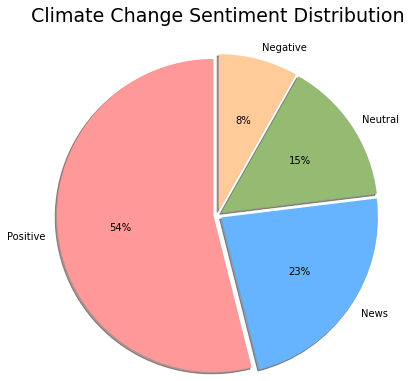

In [9]:
# Target variable's label distribution
labels=['Positive', 'News', 'Neutral', 'Negative']                         

colors = ['#ff9999','#66b3ff','#95bb72','#ffcc99']

plt.pie(df['sentiment'].value_counts(),labels=labels, startangle=90, autopct='%1.0f%%',
                                       explode = (0.05, 0.05, 0.05, 0.05),
                                       radius= 1.8, colors=colors, shadow=True,labeldistance = 1.08)
            
plt.title('Climate Change Sentiment Distribution', fontsize=19,pad=85)
plt.show()

+ **Results** : The four labels that make up the list of possible sentiments within this dataset includes Positive, News, Neutral and Negative. The proportion distribution among the labels seen here indicates an imbalance dataset. The majority of the tweets indicate a postive sentiment towards climate change (largest pie slice). The News sentiment follows in distribution size which highlights a great spread of information from news outlets. The Neutral class distribution shows those who are on the fence and require more information to make a decision about climate change. The smallest class distribution proportion are those with Negative sentiments towards climate change. The fact that the negative sentiment is so low helps with curbing misinformation.  
    
    
***

### 4.3 Top Hashtags <a class="anchor" id="section_4_3"></a>

Hashtags are popular known functions on the social media platform, Twitter. They are used to index keywords or topics that can be easily accessed by users. 

A function was created to extract the top 10 hashtags from the `message` column and then represent them in a bar chart.

In [4]:
# Extract hashtags
def extract_hashtags(words):
    import re

    pattern = r"#(\w+)"
    
    words['extract_hashtags']= words['message'].str.extract(pattern, expand=False)
    count_tweets = words['extract_hashtags'].value_counts()
    count_tweets= count_tweets.nlargest(10)
    
    return count_tweets

new_df=extract_hashtags(df_copy)
new_df

climate            271
BeforeTheFlood     135
climatechange      111
ImVotingBecause     61
Trump               55
ParisAgreement      50
COP22               48
IVotedBecause       33
ClimateChange       31
auspol              21
Name: extract_hashtags, dtype: int64

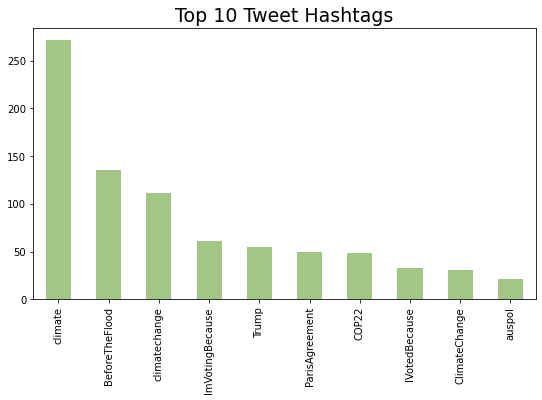

In [6]:
# Bar chart representation of the top hashtags
new_df.plot.bar(x='hashtags', y='count_tweets',figsize=(9,5),color='#a3c585')

plt.title('Top 10 Tweet Hashtags', fontsize=19)
plt.show()


**Results** : The bar chart highlights the 10 most popular hashtags during that time the dataset was collected. This gives us insights into the context in which people discuss climate change. From there we can see the the top three hashtags are climate, BeforeTheFlood and climatechange. The BeforeTheFlood hashtag gives reference to the film which was release in 2016 and starred Leonard DiCaprio. The film comprises meet ups with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions. During this period the Trump administration played a big role in respect to if America will take a stance in fighting climate change. Therefore, hashtags such ParisAgreement and COP22 were also trending at that time. 
    
***

### 4.4 Sentiments' Frequent Hashtags <a class="anchor" id="section_4_4"></a>

A function was created to extract the top 5 hashtags for each sentiment and using `sns.barplot` to visualise them on a barplot.

In [41]:
# Extract hashtags
def extract(text):
    import re
    hashtag = []
    
    for i in text:
        pattern = re.findall(r"#(\w+)", i)
        hashtag.append(pattern)
        
    hashtag = sum(hashtag, [])
    dist = nltk.FreqDist(hashtag)
    new_df = pd.DataFrame({"hashtag": list(dist.keys()),"frequency": list(dist.values())})
    return new_df.nlargest(10, columns="frequency")

In [42]:
# Extract per class
positive = extract(df_copy['message'][df_copy['sentiment'] == 1])
negative = extract(df_copy['message'][df_copy['sentiment'] == -1])
neutral = extract(df_copy['message'][df_copy['sentiment'] == 0])
news = extract(df_copy['message'][df_copy['sentiment'] == 2])

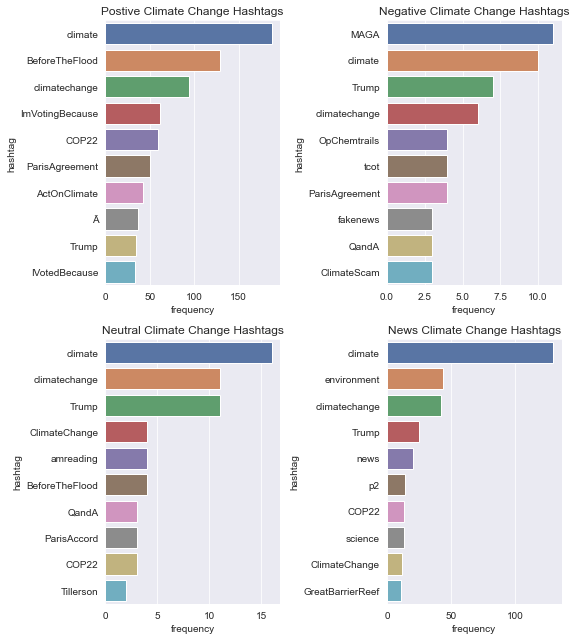

In [51]:
# Plot Histograms
fig = plt.figure()
sns.set({'figure.figsize':(8,9)})
fig.subplots_adjust(hspace=0.10, wspace=0.4)

# Positive class
ax = fig.add_subplot(2, 2, 1)
sns.barplot(data=positive,y=positive['hashtag'], x=positive['frequency'])
plt.title('Postive Climate Change Hashtags')
plt.tight_layout()


# Negative class
ax = fig.add_subplot(2, 2, 2)
sns.barplot(data=negative,y=negative['hashtag'], x=negative['frequency'])
plt.title('Negative Climate Change Hashtags')
plt.tight_layout()

# Neutral class
ax = fig.add_subplot(2, 2, 3)
sns.barplot(data=neutral,y=neutral['hashtag'], x=neutral['frequency'])
plt.title('Neutral Climate Change Hashtags')
plt.tight_layout()

# News class
ax = fig.add_subplot(2, 2, 4)
sns.barplot(data=news ,y=news ['hashtag'], x=news ['frequency'])
plt.title('News Climate Change Hashtags')
plt.tight_layout()


**Results** : The plots highlight that the hashtag climate change is seen for all of the four sentiments. Trump and his supporters used the hashtag, MAGA and therefore it is expected to be seen in the negative sentiment category. Topics such as Paris Agreement/Accord  and COP22 are also used often in all four sentiments. The negative sentiment introduces the notion of fake news and Climate scam when discussing climate change.
***

### 4.5 Tweet length per class <a class="anchor" id="section_4_5"></a>

Determined the length of the tweets in accordance to each Sentiment's class and then generating boxplots for  visual representation.

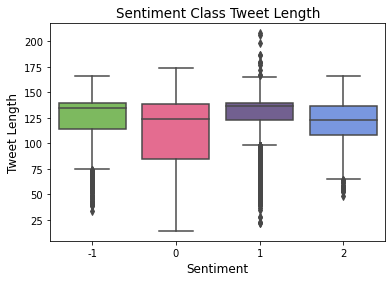

In [4]:
# Output class length of tweet
df_copy['tweet_length'] = df_copy['message'].str.len()

# Generated boxplot 
colors = ['#78C850', '#F85888', '#705898','#6890F0']
boxplot=sns.boxplot(data=df_copy,x=df_copy['sentiment'], y=df_copy['tweet_length'],palette=colors)
boxplot.set_xlabel("Sentiment", fontsize=12)
boxplot.set_ylabel("Tweet Length", fontsize=12)
boxplot.axes.set_title("Sentiment Class Tweet Length", fontsize=13.5)
plt.show()


**Results** : Most of the above box plots contain outliers, with the Pro boxplot visibly having the most outliers going beyond both the minimum and the maximum values. The outliers in this case are tweets that are either too long or too short compared to majority of the tweets in that particular class, and this is normal as in real life not every person will express themselves the same way as the majority. Though the sizes vary, the bodies of the boxplots lie at around the same level, so we can use this level as the average tweet length for all the classes.
    
***

### 4.6 Dataframe's WordCloud <a class="anchor" id="section_4_6"></a>

A word cloud was created from the complete dataframe to give context of the various words within before preprocessing.

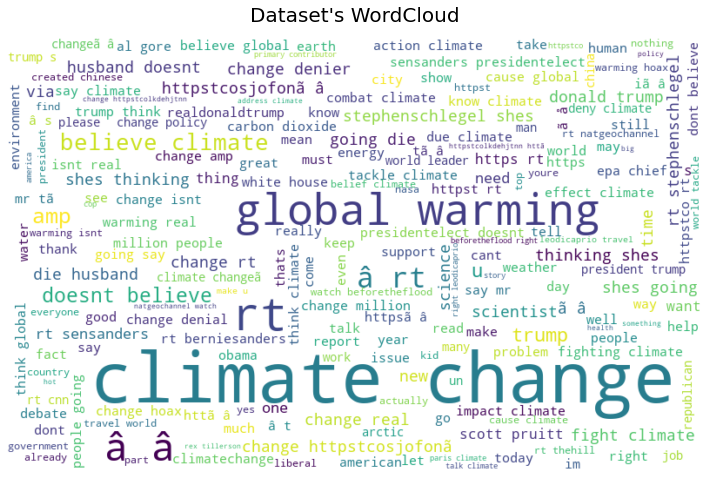

In [34]:
# Create wordcloud
words = ' '.join([i for i in (df_copy['message']).astype(str)])

w_c = WordCloud(width=800, height=500, random_state=21, max_font_size=80,background_color='white').generate(words)
plt.figure(figsize=(15, 8))
plt.imshow(w_c, interpolation="bilinear")
plt.title("Dataset's WordCloud",size=20, pad=15)
plt.axis('off')
plt.show()


**Results** : From the word cloud, climate change is visibly the most common amongst the tweets. This makes sense as the focus is on the terms that talk about it, so whatever the tweet sentiment is it will contain climate change. One other terms to note here is global warming, which is a concequence of climate change. And then there are the terms like fight climate, change denial, evidence, tackle climate to name a few that talk to the people's opinions on climate change.
    
***

## 5. Data Engineering <a class="anchor" id="chapter5"></a>

The Data Engineering process includes the concepts of data cleaning and feature (characteristics/properties) extraction from raw data. This form of data wrangling gives rise to better understanding of predictive models, which could result in improved model performance accuracy on unseen data. Furthermore, the combination of domain knowledge and feature selection is vital in generating fair machine learning algorithms.

### 5.1 Remove Punctuations and set to Lowercase <a class="anchor" id="section_5_1"></a>

The initial steps in the process of "cleaning" our tweets include:
+ Converting the texts into the same (`lower`) casing format.
+ `import string` was applied to eliminate punctuations within the text so that words are treated equally.

In [7]:
# Function sets lowercase and removes punctuations
def remove_punctuations(case):
    import string
    case = ''.join([i for i in case if i not in string.punctuation])
    
    user_output=case.lower().strip()
    return user_output

In [8]:
df_copy['message'] = df_copy['message'].apply(remove_punctuations)

### 5.2 Remove Hashtags <a class="anchor" id="section_5_2"></a>

The function below uses the library, `re`, which aids in removing hashtags and retrieving "cleaner" tweets.

In [9]:
# Function removes hashtags from tweets
def remove_hashtag(sentence):
    import re
    hashtag = r'#\w*'
        
        
    for i in sentence:
        tweet=re.sub(hashtag,'',sentence)  
    return tweet

In [10]:
df_copy['message'] = df_copy['message'].apply(remove_hashtag)

### 5.3 Remove Username Handles <a class="anchor" id="section_5_3"></a>

Another function was created (includes the library, `re`) to remove username handles as it does not add significance to the texts.

In [11]:
# Function removes username handles
def remove_username(sentence):
    import re
    user = r'@[\w]*'
    
    for i in sentence:
        tweet=re.sub(user,'',sentence)
    return tweet 

In [12]:
df_copy['message'] = df_copy['message'].apply(remove_username)

### 5.4 Remove Weblinks <a class="anchor" id="section_5_4"></a>

Weblinks, also known as URLs (or Uniform Resource Locators), references locations on the web. The function below
removes URLs as it does not provide any additional information about the text. The library, `re` was applied for regular expression matching operations.

In [13]:
# Function removes the weblinks in tweets.
def remove_urls(sentence):
    import re
    url= r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = r'url-web'
    
    for i in sentence:
        tweet =re.sub (url,subs_url,sentence)
    return tweet 

In [14]:
df_copy['message'] = df_copy['message'].apply(remove_urls)

### 5.5 Remove Stopwords <a class="anchor" id="section_5_5"></a>

Stopwords are universal English words that do not add meaning to a sentence eg. "the", "he", "of" etc. These common words can be removed without sacrificing meaning of the sentence and the topic we are trying to extract within the dataset/document.

In [15]:
stop_words = stopwords.words('english')
# Function removes stopwords

def cleaning_stopwords(text):
    return " ".join([i for i in str(text).split() if i not in stop_words])

In [16]:
df_copy['message'] = df_copy['message'].apply(lambda text: cleaning_stopwords(text))

### 5.6 Remove Numbers <a class="anchor" id="section_5_6"></a>

The function below removes numbers from text e.g. "1,2,3.." etc, as they does not add value to text keyphrases for sentiment anlysis. The `re` library was imported for regular expression matching operations.

In [17]:
# Function to remove numbers
def remove_numbers(text):
    import re
    
    return re.sub('[0-9]+', '', text)

In [18]:
df_copy['message'] = df_copy['message'].apply(lambda x: remove_numbers(x))

### 5.7 Tokenization <a class="anchor" id="section_5_7"></a>

The primary step in Natural Language Processing (NLP) is `Tokenization`. Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph. Therefore, the concept of tokenization is to break down raw input text chunks into its smaller counterparts (sentences into words).

In [19]:
# Function creates tokens
def tokenize(words):
    tokeniser = TreebankWordTokenizer()
    
    return tokeniser.tokenize(words)

In [20]:
df_copy['message'] = df_copy['message'].apply(tokenize)

### 5.8 Apply Lemmatization  <a class="anchor" id="section_5_8"></a>

To transform the data, Lemmatization (`lemmatize`) was applied to the dataframe. Lemmatization is a more powerful tool than Stemming as it displays the morpholical analysis of words (replacing a word with its root form).

In [21]:
lem = nltk.WordNetLemmatizer()
# Function to apply lemmatization
def lemmatizer(text):
    text = [lem.lemmatize(i) for i in text]
    return text

In [22]:
df_copy['message'] = df_copy['message'].apply(lambda x: lemmatizer(x))

### 5.9 Data Visualisation  <a class="anchor" id="section_5_9"></a>

Data visualisation was applied after preprocessing to gain insights of the newly formed dataframe. 

#### 5.9.1 Dataframes' Top Words <a class="anchor" id="sub_section_5_9_1"></a>
The top 10 words was extracted from the dataset using `sns.barplot` visualisation.

In [94]:
# Attain top 10 words
from collections import Counter

freq_words = Counter([i for item in df_copy['message'] for i in item])
output = pd.DataFrame(freq_words.most_common(10),columns=['word', 'Frequency'])

output

,word,Frequency
0,climate,12897
1,change,12274
2,rt,9722
3,global,3764
4,warming,3420
5,trump,2284
6,believe,1154
7,u,1004
8,amp,872
9,doesnt,812


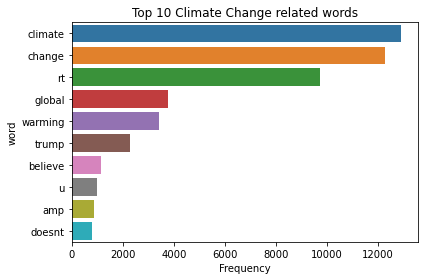

In [86]:
# Plot chart
sns.barplot(data=output,y=output['word'], x=output['Frequency'])
plt.title('Top 10 Climate Change related words')
plt.tight_layout()


**Results** : The above table and barchart indicates that the word climate (12,897) is the most common word. The words global and warmimg are also present in the top 10 chart with 3764 times and 3420 times respectively. There are also a number of rt that indicates people were sharing ideas , think pieces etc. 
    
***

#### 5.9.2 Sentiments' Frequent Words <a class="anchor" id="sub_section_5_9_2"></a>

WordClouds were generated to analyse the words surrounding each of the Twitter sentiment classes. A wordcloud is a collection of words depicted in various sizes. The bigger and bolder the word appears, the more often it's mentioned within its text thereby relaying its importance

In [25]:
#  Rejoins tokens for wordcloud
rejoin = lambda tokens: ' '.join(tokens)
df_copy['message'] = df_copy['message'].apply(rejoin).str.lower()

#Words in the positive class
positive_words =' '.join([text for text in df_copy['message'][df_copy['sentiment'] == 1]]) 

#Words in negative class
negative_words = ' '.join([text for text in df_copy['message'][df_copy['sentiment'] == -1]]) 

#Words in the neutral class
neutral_words =' '.join([text for text in df_copy['message'][df_copy['sentiment'] == 0]]) 

#Words in the news class
news_words =' '.join([text for text in df_copy['message'][df_copy['sentiment'] == 2]]) 

i. **Postive WordCloud**

(-0.5, 799.5, 499.5, -0.5)

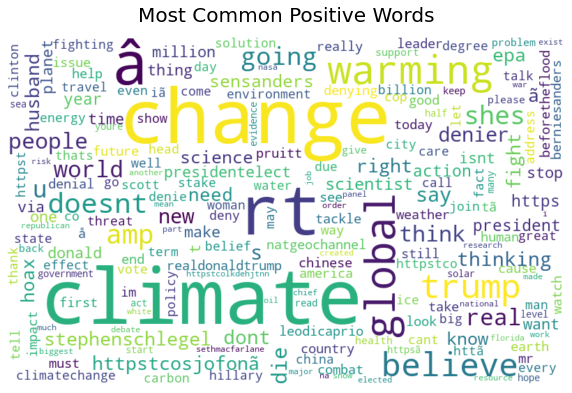

In [27]:
# Create wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white', collocations=False).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common Positive Words",size=20, pad=15)
plt.axis('off')

**Results :** The wordcloud suggests that most positive sentiments include global, warming, climate, change, believe,  real and rt (same sentiment shared amongst people). There are no links or http indicating that data cleaning performed has worked well. The wordcloud suggests there was alot of discussion around scientific genre which includes words such as science, carbon ,research and epa. As this data was collected during the gaining of American election period votes, many tweets were in relation to American politicians and their stance on climate change in exchange for ordinary American's votes.

ii. **Negative WordCloud**

(-0.5, 799.5, 499.5, -0.5)

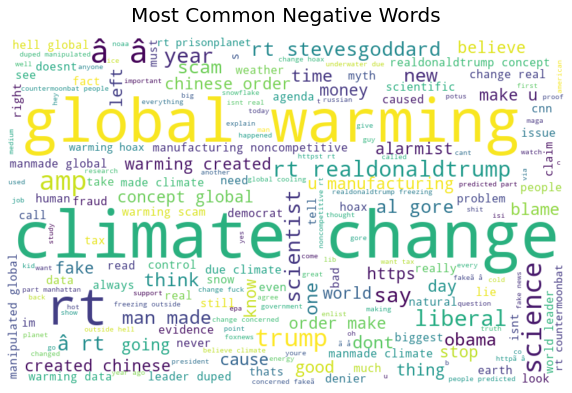

In [29]:
# Create wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common Negative Words",size=20, pad=15)
plt.axis('off')


**Results :** A vast majority of the key words in the negative sentiments are very political and scientific, which indicates a lot of sentiments said by world leaders on the topic of climate change. Trump, a firm anti climate change individual is appearing very significantly, including the terms scientist, made, fake, alarmist which shows either a lot of people not believing that is real, a hunch or because of a lack of scientific evidence to support the claims. There also a lot of words like scam, money, man-made going on indicating one of the reasons they may not really believe climate change or have negative sentiment against it.

iii. **Neutral WordCloud**

(-0.5, 799.5, 499.5, -0.5)

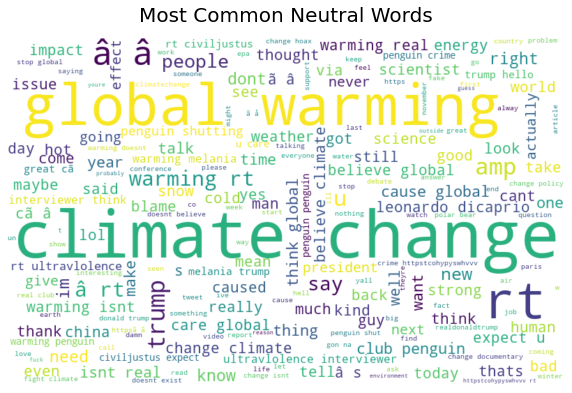

In [31]:
# Create wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common Neutral Words",size=20, pad=15)
plt.axis('off')

**Results :** A majority of the neutral words are discussing, engaging and asking about the effects on climate change as seen with words interviewer and scientist. However, the wordcloud also indicates how often Trump made headlines during that period. The mention of penguins pop up often,which indicates they were news worthy due to endangerment because of the effects of climate change. The mention of Leonardo DiCapro indicates that his film Before The Flood made headlines.

iv. **News Cloud**

(-0.5, 799.5, 499.5, -0.5)

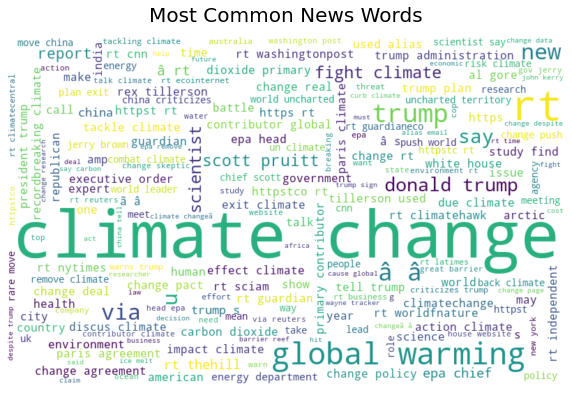

In [33]:
# Create wordcloud
wordcloud = WordCloud(width=800, height=500,random_state=21,  max_font_size=110,background_color='white').generate(news_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common News Words",size=20, pad=15)
plt.axis('off')

**Results :** As we can see that the name Trump plays a huge role when it comes to the news sentiment. The Trump administration did not consider Paris Climate Accord (agreement) which made headlines during that time. The wordcloud also introduces a vast majority of issues whereby technical or jargon specific terms such as executive order, policy etc, gets broken and discussed regularly. The word cloud also indicates that majority of the words are well distributed and spoken of almost similarly. Most of that words are not frequently requiring except climate change and global warming. There are a few countries and news outlets mentioned which are in accordance for this wordcloud.


----

### 5.9 Data Preprocessing  <a class="anchor" id="section_5_9"></a>

In order to avoid **data leakage** (train-test contamination), the dataset was split before applying the vectorizer fit method (other preprocessing techniques could follow the same strategy) thus ensuring the model applied will not be seen by test set during the training phase. This encourages good validation scores and deployment at end predictions.

<div class="alert alert-block alert-info"> It is important to note that the data is in an imbalanced form. <b>Vectorisation and modelling</b> will be applied on both <b>imbalanced and balanced data.</b>
    
</div> 

#### 5.10.1 Data Splitting <a class="anchor" id="sub_section_5_10_1"></a>

Before buidling respective models, the first step was to divide the data into `X` (features-independent) and the `y` (target/label-dependent) variables.

In [23]:
# Selection of X and y
X =df_copy['message'].astype(str)
y =df_copy['sentiment']

The `train_test_split` method was then applied to split the dataset into training and test sets. The training dataset was split into 70% (X_train and y_train) for training and 30% (X_test, y_test) for the validation test, which are used for training and fitting a model. The 70/30 split is adequate to evaulate model performance and best model selection. The `random_state` ensures data reproducibility each time the `train_test_split` method is called, which in this case it is set to 1.

In [24]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 5.10.2 Vectorization <a class="anchor" id="sub_section_5_10_2"></a>

After splitting the dataset, an important feature extraction NLP technique known as Vectorization was applied. The vectorization approach converts input raw format (text) data into corresponding vectors (matrix) of real numbers. This approach allows for machine learning models to perform mathematical operations and attain identifiable features from the text for which the model can train on. A popular embedding/text vectorization technique is the Term Frequency–Inverse Document Frequency (`TF-IDF`).

##### 5.10.2.1 Term Frequency–Inverse Document Frequency (TF-IDF) <a class="anchor" id="sub_section_5_10_2_1"></a>

The `TF-IDF` vectorizer is a numerical statistical technique that extracts how relevant or essential the word is within that particular document. This vectorizer is a great frequency-based method because it takes into account not only words that appear more often but important words that appear less frequent. The term `TF-IDF` can be better defined as scoring or vectorizing a word by multiplying that particular word's Term Frequency (TF) with the Inverse Document Frequency (IDF) (see below).



+ **Term Frequency (TF):** Defined as the number of times the term/word appears compared to the total number of terms/words.

$$TF = \frac {number\space of \space times \space the \space term\space appears \space in \space the \space document}{total \space number \space of \space terms \space in \space a \space document}$$

+ **Inverse Document Frequency (IDF):** Defined as the proportion of documents in the corpus that contain the word/term. Words that are unique to a small percentage of documents receives a higher rank value than words common across all documents (e.g., a, the, and).
 
$$IDF =log \frac {number \space of  \space documents \space in \space the \space corpus}{number\space of\space documents\space in\space the\space corpus \space contain\space\space the \space term}$$


+ **TF-IDF:** Defined by multiplying the TF and IDF scores.

$$TF-IDF = TF*IDF$$

It is important to note that `TF-IDF` and other nlp transformations do no require  standardisation as its  raw form of vectors are already reasonably scaled (fall in a constant range of values) and thus allow for better model performance. For `TF-IDF` vectorization to be carried out on this dataset, the vectorizer object was first instantiate before the conversion into a matrix (see code below). 

In [25]:
# convert to vectors 
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train =  tfidf.transform(X_train)
X_test= tfidf.transform(X_test)

<div class="alert alert-block alert-info"> The next section will focus on <b>balancing the dataset</b> using a well known technique known as <b>Resampling</b>.

</div> 

##### 5.10.3 Resampling <a class="anchor" id="sub_section_5_10_3"></a>

Most classification machine learning models are built around the assumptions that each class within a dataset are equal in number. An uneven distribution amongst the different class labels could lead to bias prediction towards the most prominent class leaving a poor predictive accuracy for the minority class. As previously shown in the EDA, there are various distributions among the classed e.g.positive sentiments for climate change has a higher distribution than the rest of the class labels. This is known as an imbalanced dataset. Seaborn's `countplot` (see plot below) was used to reiterate this visually.

Text(0.5, 1.0, 'Class Imbalance of Dataset')

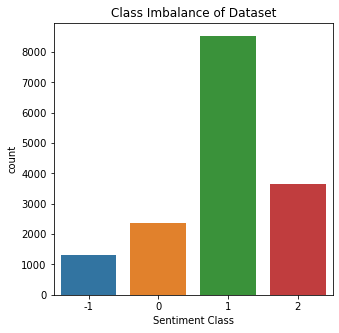

In [26]:
# Sentiment distributions
plt.figure(figsize=(5,5))
sns.countplot(df_copy.sentiment)

plt.xlabel('Sentiment Class')
plt.title('Class Imbalance of Dataset')

The `Resampling` technique is defined as removing samples at random from the majority class (`undersampling`) and/or adding more instances randomly from the minority class (`oversampling`) (refer to image below). Even though balancing a dataset comes with benefits, the concept does come with disadvantages i.e. overfitting due to oversampling and undersampling could cause the loss of information. 

<figure>
<img src="resampling.png" width="500" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: Kota, 2020
    </font>                                                     
</figure>


The following code blocks will implement two `oversampling` methods and a `undersampling` method.

##### 5.10.3.1 Oversampling <a class="anchor" id="sub_section_5_10_3_1"></a>

The `RandomOverSampler()` method randomly replicates from the minority classess and adding them to the dataset.

In [31]:
# Apply to vectorized split data
oversample = RandomOverSampler(sampling_strategy='minority')
x_randomover, y_randomover = oversample.fit_resample(X_train,y_train)

In [32]:
# Count
y_randomover.value_counts()

-1    5937
 1    5937
 2    2559
 0    1645
Name: sentiment, dtype: int64

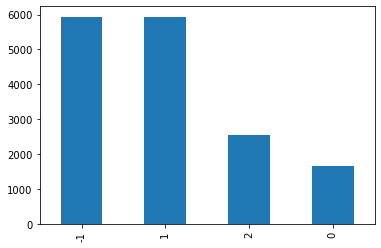

In [33]:
# Plot chart
plot= y_randomover.value_counts().plot(kind='bar')

**Results :** The oversampling method caused -1(Negative sentiment) and 1(Positive sentiment) to have an equal distribution.

##### 5.10.3.2 Synthetic Minority Over-sampling Technique (SMOTE)  <a class="anchor" id="sub_section_5_10_3_2"></a>

The Synthetic Minority Over-sampling Technique (`SMOTE()`)  generates synthetic samples for the minority class and is said to overcome the overfitting problem posed by random oversampling.

In [34]:
# Apply to vectorized split data
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [35]:
# Count
y_smote.value_counts()

-1    5937
 1    5937
 0    5937
 2    5937
Name: sentiment, dtype: int64

<AxesSubplot:>

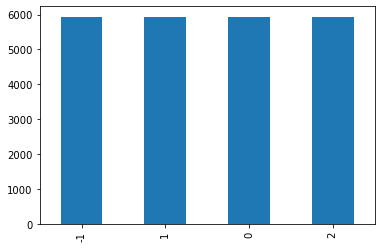

In [36]:
y_smote.value_counts().plot(kind='bar')

**Results :**  The SMOTE method applied here ensured each sentiment label to have an equal distribution.

##### 5.10.3.3  Undersampling <a class="anchor" id="sub_section_5_10_3_3"></a>

Below the `RandomUnderSampler()` method randomly removes from the subset of the majority class, however this could result in losing information invaluable to a model.

In [56]:
# Apply to vectorized split data
RanUS = RandomUnderSampler()
x_RanUS, y_RanUS = RanUS.fit_resample(X_train, y_train)

In [57]:
# Count
y_RanUS.value_counts()

-1    932
 0    932
 1    932
 2    932
Name: sentiment, dtype: int64

<AxesSubplot:>

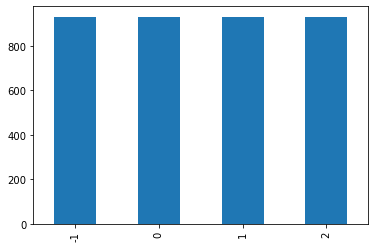

In [58]:
# Plot chart
y_RanUS.value_counts().plot(kind='bar')

**Results :** The random undersampling method also ensured an equal distribution amongst the class sentiments.

## 6. Classification Models <a class="anchor" id="chapter6"></a>

For this project, five Classification models were built for the prediction of Twitter users' sentiment on climate change. As mentioned earlier in this document, classification analysis is a subset of supervision machine learning modelling. These classification type models utilizes input data to predict an output of some likelihood or probability in which it is classified into a predecided category. Classification algorithms can further be understood as a form of "pattern recognition", an output pattern of similar words, sequences or sentiments etc.

<div class="alert alert-block alert-info">This section consists of describing and training each respective model using the imbalanced dataset.
    
</div>

### 6.1 Logistic Regression  <a class="anchor" id="section_6_1"></a>

The classification Logistic Regression model is useful in linearly separable data i.e predicting binary data. This model uses a logistic/S-shaped (sigmoid) function to output probabilities and predictions in relation to two maximum values (0 or 1) (see image below). By mapping the function within the range of 0 to 1 and applying a threshold, the categorical outcome value could fall within either of the two categories i.e. 0 or 1.


<figure>
<img src="logistic_image.png" width="300" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: Kanade, 2022
    </font>                                                     
</figure>


In [37]:
# Train the model
LRmodel = LogisticRegression(multi_class='ovr')
LRmodel.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

+ We specified a Logistic Regression model as `LR_model`. This multiclass uses the one-vs-rest (OvR) whereby the ‘multi_class’ option is set to ‘ovr’. In order to fit our basic logistic regression model instance, the predictor variables' training set (X_train) and the predicted y_train variable were added to it.

### 6.2 Naive Bayes <a class="anchor" id="section_6_2"></a>

The Naive Bayes is a probabilistic supervised machine learning algorithm that derives from Bayes’ theorem (refer to equation below). It assumes that the presence of a particular features in a class is unrelated (independent) to the presence of any other feature.


$$P(A\mid B) = \frac {P(B\mid A)* P(A)} {P(B)}$$

+ $P(A\mid B)$: The posterior probability of occurrence A (class) given B (predictor).
+ $P(A)$: The likelihood ration that measures the probability of occurrence B (predictor) given A (class).
+ $P(B\mid A)$: The prior probability of actual A (class).
+ $P(B)$: The prior probability of B (predictor).

The `scikit-learn` library contains three types of Naive Bayes classification modules i.e. Gaussian, Multinomial and Bernoulli. For this project Multinomial-Naive Bayes module was implement. Multinomial typed module is prominently used in text classification problems such as this, as its based on discrete counts.

In [38]:
# Train the model
NB_model = MultinomialNB(alpha=0.1)
NB_model.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

+ We declared a Naive Bayes model named `NB_model`. The additive parameter `alpha` was set at `0.1`, as it controls the form of the model itself. The model was then trained by calling the fit function on the train dataset that we declared in our train test section.

### 6.3 Random Forest <a class="anchor" id="section_6_3"></a>

The Random Forest algorithm is defined as a ensemble learning method whereby it consists of multiple decision trees (refer to the image below). An overall/average prediction result is calculated after combining several decision trees and attaining their predictions.

<figure>
<img src="Random_forest.png" width="420" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: Khan et al., 2022
    </font>                                                     
</figure>

In [39]:
# Train the model
RF_model=RandomForestClassifier(n_estimators = 200, max_depth = 5, random_state = 150)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=150)

+ Random Forest Classifier model named `RF_model` was declared but instead of having a basic model, parameters named `max_depth`, `n_estimators` and `random_state` was passed in. 
    + `max_depth` refers to the measure of how far the tree has to be expanded down to in order for each node to reach the leaf node.
    + `n_estimators` refers to the number of trees the model should create.
    + `random_state` refers to the random number that ensures reproducibility from the dataset when the model is used.


+ The parameters for this model was passed through as to have more controllability over the model. The model was then trained by calling the fit function on our train dataset in which we declared in the train test section.

### 6.4 Support Vector Classfier (SVC) <a class="anchor" id="section_6_4"></a>

The Support Vector Machine (SVM) is a supervised classification method that separates data using *hyperplanes*. A hyperplane acts like a decision boundary between the different classes. Each segment will contain only one type of data in that class (refer to image below). For this project a Linear SVC was applied as it finds a hyperplane that maximizes the distance between classes. 

<figure>
<img src="FINAL_marginal_hyperplane.jpeg" width="470" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: JavaTPoint, 2022
    </font>                                                     
</figure>

In [40]:
# Train the model
SVC_model = LinearSVC(class_weight='balanced')
SVC_model.fit(X_train,y_train)

LinearSVC(class_weight='balanced')

+ A Linear SVC model as `SVC_model` was declared. This liblinear SCV model has a `class_weight='balanced'` parameter, which is defined by each class getting a weight equal to 1 and divided by the number of times that class appears in the dataset. Therefore, classes that appear more often will get lower weights and thus further divided by the average of all the inverse class frequencies. The was trained using the X_train and y_train variables.

### 6.5 K-nearest Neighbors <a class="anchor" id="section_6_5"></a>

The K-nearest Neighbors (KNN) algorithm is said to store all the available cases and classifies new cases based on a similarity measure. The 'K' in the KNN algorithm is the nearest 'neighbor' the value is taken from. For example, if K=1 then the subject is simply assigned to the class of that single nearest neighbor from the diagram.

<figure>
<img src="k-nearest-neighbor-algorithm-for-machine-learning2.png" width="470" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: JavaTPoint, 2022
    </font>                                                     
</figure>

In [41]:
# Train the model
KNN_model= KNeighborsClassifier(n_neighbors=6,metric='minkowski', p=2,)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

+ A k-Nearest-Neighbor Classifier model was declared as `KNN_model`. The default parameter is set at `metric='minkowski` whereby its formula set the parameter  `p` to assigned to `2` for the euclidean distance. The `n_neighbors`  which classifies a data point based on `6` of its nearest neighbors. The fit' method was called to train the model on the training data (X_train,y_train) and the 'predict' method to do the testing on testing data (X_test) in the next section.

## 7. Model Performance <a class="anchor" id="chapter7"></a>

For evaluation of the performance of the models, `accuracy`, `precision`, `recall`, `f1-score`, and `train time` will be used as the evaluation metrics. These metrics evaluate the (generalization) performance of the model. **Accuracy** is the ratio of the number of predictions the model got correct, over the number of predictions that were made. 
**Precision** speaks to when a model predicts yes, how often it gets it right. While **Recall** looks at when the outcome is actually yes, how often is the model able to predict it as such.
The **F1 score** is a measure of a model's accuracy on a dataset used to evaluate binary classification systems(positive or negative). The F1 score sums up the predictive performance of a model by combining precision and recall.
The higher these score, means a more accurate model.
The **train time** is essentially how long it takes for the model to learn the train data. While the higher score is preffered for the other metrics, not for the train time. The aim is to have a lower train time.

In [42]:
# Define model names
names = ['Logistic Regression', 'Naive Bayes', 
         'Random Forest', 'SVM Classifier',          
         'KNN']

In [43]:
# Call the fitted models
classifiers = [
    LRmodel,NB_model,RF_model,SVC_model,KNN_model
]

In [44]:
# Predicting and scoring
results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,average='weighted')

    f1        = metrics.f1_score(y_train, y_pred,average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('Complete')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting SVM Classifier model...
... predicting
... scoring
Fitting KNN model...
... predicting
... scoring
Complete


In [45]:
# Output table
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
SVM Classifier,0.993949,0.993983,0.993949,0.993952,0.733633,0.085181
Naive Bayes,0.961709,0.963106,0.961709,0.961178,0.677586,0.002137
Logistic Regression,0.808905,0.832396,0.808905,0.791550,0.688235,0.791690
KNN,0.759234,0.754454,0.759234,0.753658,0.654703,0.000464
Random Forest,0.536169,0.287477,0.536169,0.374278,0.386074,0.379952


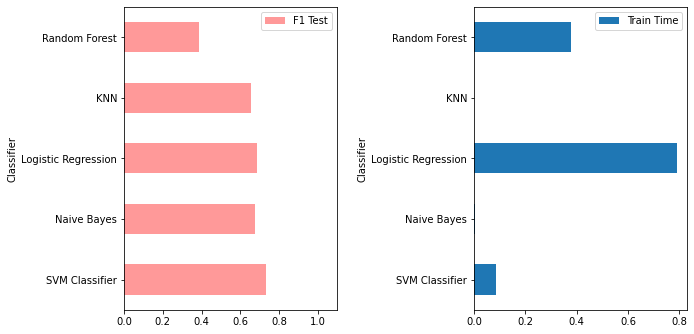

In [46]:
# Visually represent the above outputs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = ['#ff9999']
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='barh', ax=ax[0], xlim=[0,1.1], ylim=[0.00,1.1], color=colors)
results.plot(y='Train Time', kind='barh', ax=ax[1])
fig.tight_layout(pad=2.0)


**Results** : The crucial scoring method for this predict is the `f1` metric. The table and plot above shows the different performance metrics for each of the five models trained with the dataset. Looking at the metrics for each model, the SVM classifier has the best `accuracy`,`precision`, `recall`, `f1` score for both train and test data, while the random forest has the worst. Even though the KNN and Naive Bayes has the best train time, both did not score the best on the other metrics. 
***

The SVM classifier has shown to have the best F1 score, therefore, a `classification report` was generated for a closer look at this classifier.

In [48]:
#y_pred_SVC_model = SVC_model.predict(X_test)
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred_SVC_model))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_SVC_model))

The accuracy score of the SVC is: 0.7368310155920775


Classification Report:

               precision    recall  f1-score   support

          -1       0.60      0.54      0.57       364
           0       0.54      0.48      0.51       708
           1       0.80      0.81      0.81      2593
           2       0.73      0.79      0.76      1081

    accuracy                           0.74      4746
   macro avg       0.67      0.66      0.66      4746
weighted avg       0.73      0.74      0.73      4746



A `confusion matrix` was generated to attain more information on the performancy of this model. 

<AxesSubplot:title={'center':' '}, xlabel='Predicted label', ylabel='True label'>

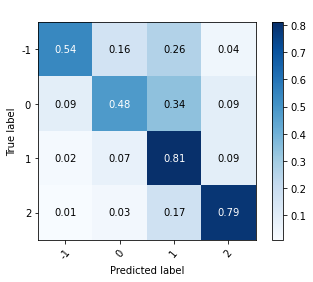

In [166]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,
                                    y_pred_SVC_model,
                                    x_tick_rotation=50,
                                    title=' ',
                                    normalize=True)

**Results** : By generating the confusion matrix, the performance of the model was better understood. The SVC model was able to classify the models accurately with less confusion when predicting.

***

<div class="alert alert-block alert-info">
The chosen model, SVC, was applied on the balanced dataset using the earlier <b>Resampling</b> techniques' outputs.


</div>


#### a. Oversampling

In [50]:
# Modelling
SVC_model = LinearSVC(class_weight='balanced')
SVC_model.fit(x_randomover, y_randomover)
y_pred_oversamp_SVC = SVC_model.predict(X_test)

In [43]:
# Report
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_oversamp_SVC))



Classification Report:

               precision    recall  f1-score   support

          -1       0.57      0.56      0.57       364
           0       0.54      0.46      0.50       708
           1       0.80      0.81      0.80      2593
           2       0.73      0.79      0.76      1081

    accuracy                           0.73      4746
   macro avg       0.66      0.65      0.66      4746
weighted avg       0.73      0.73      0.73      4746



**Results** : After modelling the oversampling method balanced dataset, the metrics are shown to be poorer than that of the imbalanced dataset.
***

#### b. Synthetic Minority Over-sampling Technique (SMOTE)  

In [52]:
# Modelling
SVC_model.fit(x_smote, y_smote)
y_pred_SMOTE_SVC = SVC_model.predict(X_test)

In [53]:
# Report
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_SMOTE_SVC))



Classification Report:

               precision    recall  f1-score   support

          -1       0.59      0.54      0.56       364
           0       0.51      0.49      0.50       708
           1       0.81      0.79      0.80      2593
           2       0.72      0.80      0.76      1081

    accuracy                           0.73      4746
   macro avg       0.66      0.65      0.65      4746
weighted avg       0.73      0.73      0.73      4746



**Results** : After modelling the SMOTE method balanced dataset, the metrics are shown to be poorer than that of the imbalanced dataset.
***

#### c. Undersampling

In [60]:
# Modelling
SVC_model.fit(x_RanUS, y_RanUS)
y_pred_undersamp_SVC = SVC_model.predict(X_test)

In [61]:
# Report
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_undersamp_SVC ))



Classification Report:

               precision    recall  f1-score   support

          -1       0.36      0.69      0.48       364
           0       0.39      0.47      0.42       708
           1       0.84      0.56      0.68      2593
           2       0.59      0.81      0.68      1081

    accuracy                           0.61      4746
   macro avg       0.55      0.63      0.56      4746
weighted avg       0.68      0.61      0.62      4746



**Results** : After modelling the undersampling method balanced dataset, the metrics are shown to be poorer than that of the imbalanced dataset.
***

## 8.  Hyperparameter Tuning <a class="anchor" id="chapter8"></a>

<div class="alert alert-block alert-info">Based on the F1 score readings, we will focus on the <b> SVC Classifier</b> model for  hyperparameter tuning.</div>

Hyperparameter tuning/optimization is the process of determining the right combination of hyperparameters in which the machine learning algorithm can output its maximimum performance and accuracy. It is to note that hyperparameters are not the basic default parameters that the models are fitted with but instead are manually set parameters used to estimate the model parameters.
 
The `Scikit-learn` library was used for hyperparameter tuning and the tool, Comet was useful in tracking and managing the various input hyperparameters on respective models. However, the code blocks only focuses on the SVC model.

The parameters were set using `C` , the inverse regularization strength.

In [67]:
# set C
parameters = {'C':(0.25, 10, 1.0, 0.1, 0.001)} 

`.GridSearchCV()` method was applied to test out various combinations of the specified hyperparameters and their values. The performance is then calculated from each combination and which the best value for those hyperparameters is selected.

In [69]:
# Gridsearch instance
clf = GridSearchCV(SVC_model, param_grid=parameters,scoring='accuracy', n_jobs=-1, verbose=4)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': (0.25, 10, 1.0, 0.1, 0.001)}, scoring='accuracy',
             verbose=4)

[CV 2/5] END ................................C=10;, score=nan total time=   0.7s
[CV 4/5] END ............................C=0.25;, score=0.725 total time=   0.1s
[CV 1/5] END .............................C=1.0;, score=0.718 total time=   0.1s
[CV 4/5] END .............................C=1.0;, score=0.726 total time=   0.1s
[CV 5/5] END .............................C=0.1;, score=0.701 total time=   0.1s
[CV 3/5] END ...........................C=0.001;, score=0.536 total time=   0.0s
[CV 1/5] END ................................C=10;, score=nan total time=   0.7s
[CV 3/5] END ............................C=0.25;, score=0.740 total time=   0.1s
[CV 2/5] END .............................C=1.0;, score=0.708 total time=   0.1s
[CV 5/5] END .............................C=1.0;, score=0.711 total time=   0.1s
[CV 4/5] END .............................C=0.1;, score=0.709 total time=   0.1s
[CV 4/5] END ...........................C=0.001;, score=0.537 total time=   0.0s
[CV 4/5] END ...............

In [70]:
# Best param
clf.best_params_

{'C': 1.0}

In [65]:
# Train the model
y_opt = clf.predict(X_test)

In [66]:
# Report
print("\n\nClassification Report:\n\n", classification_report(y_test, y_opt))



Classification Report:

               precision    recall  f1-score   support

          -1       0.60      0.54      0.57       364
           0       0.54      0.48      0.51       708
           1       0.80      0.81      0.81      2593
           2       0.73      0.79      0.76      1081

    accuracy                           0.74      4746
   macro avg       0.67      0.66      0.66      4746
weighted avg       0.73      0.74      0.73      4746



**Results** : The  above report indicates there was no improvement in the f1 score after hyperparameter tuning.

***

## 9.  Run Comet Experiment <a class="anchor" id="chapter9"></a>

<div class="alert alert-block alert-success">The following code blocks were executed to run an experiment within this environment. This is done for each model at a time as per requirement of Comet. The SVC model was used as an example in the code blocks below. The output will be delivered to the Comet experiment profile via a link.</div>

In order to log on Comet, the code below saves each metric accordingly.

In [33]:
"""
# Logging metrics
f1 = f1_score(y_test, y_pred_SVC_model, average='weighted')
precision = precision_score(y_test, y_pred_SVC_model, average='weighted')
recall = recall_score(y_test,y_pred_SVC_model, average='weighted')
"""

Dictionaries of the above metrics were generated and will be seen on the Comet page.

In [34]:
"""
#Create dictionaries
params = {"random_state": 1,
          "model_type": "SVC_model ", 
          #"param_grid": str(parameters),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }
"""

The above code block containing the parameter and metric dictionaries were loogged in the code block below.

In [35]:
"""
# Log parameters and metrics
experiment.log_parameters(params)
experiment.log_metrics(metrics)
"""

To ensure the experimet is completed, `experiment.end()` is executed.

In [ ]:
"""
# End experiment 
experiment.end()
"""

`experiment.display()` is executed to display the experiments inside comet.ml page.

In [ ]:
"""
# Display experiment
experiment.display()
"""

## 10.  Apply Model on Test Dataset <a class="anchor" id="chapter10"></a>

In order to yield a prediction from the test dataset, the same preprocessing and feature engineering practices that was administered on the train dataset (`df_copy`) was done on the test dataset (`df_test_copy`).

The test dataset, `test.csv` was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df_test`.

In [40]:
# Loading the test dataset
df_test = pd.read_csv('test.csv')

To prevent any unwanted changes occurring to the original test dataset, a copy of the test dataframe was made using the `.copy()` method and referred to as `df_test_copy`.

In [41]:
# Copy the real test data
df_test_copy = df_test.copy()

To ensure that the same preprocessing practices that were applied on the`df_copy` was applied to the `df_test_copy`- the following functions were executed.

In [42]:
# Apply data engineering process
df_test_copy['message'] = df_test_copy['message'].apply(remove_punctuations)
df_test_copy['message'] = df_test_copy['message'].apply(remove_hashtag)
df_test_copy['message'] = df_test_copy['message'].apply(remove_username)
df_test_copy['message'] = df_test_copy['message'].apply(remove_urls)
df_test_copy['message'] = df_test_copy['message'].apply(lambda text: cleaning_stopwords(text))
df_test_copy['message'] = df_test_copy['message'].apply(lambda x: remove_numbers(x))
df_test_copy['message'] = df_test_copy['message'].apply(tokenize)
df_test_copy['message'] = df_test_copy['message'].apply(lambda x: lemmatizer(x))

# Correct format
df_test_copy['message'] =df_test_copy['message'].apply(str)

Applied same vectorization technique to the `df_test_copy` dataset.

In [43]:
# Vectorization 
test_input = tfidf.transform(df_test_copy['message'])

For this test dataframe, the logistic regression model (`LRmodel`) was selected for this instance.

In [ ]:
# Model instance
output= model_test .predict(test_input)

In order to submit to [Kaggle]("https://www.kaggle.com/competitions/edsa-sentiment-classification"), the `.to_csv` method was applied in order to run a prediction on the test dataset.

In [ ]:
# Output submission file
output = pd.DataFrame({'tweetid': df_test_copy.tweetid,
                       'sentiment': output})
output.to_csv('SVC_submission.csv', index=False)
output

## 11. Chosen Model Explanation <a class="anchor" id="chapter11"></a>

<figure>
<img src="svc_conclusion.jpeg" width="300" />
<p style='text-align: center; margin-right: 3em; font-family: Serif;'Serif;
<font     size="2"
          face="arial"
          color="#808080">
          Source: Pupale, 2018
    </font>                                                     
</figure>

After training and evaluating the models described in this notebook, we decided on the SVC model as the best classification model. The SVC model was chosen based on its highest F1 score and low training time. The model outputs classes based on where each data point is in the n-dimensional space and then generates a best line fit that seperates the n-dimensional space into classes. Every time a new data point is added to that space it can fall into its appropriate class (positive, negative , neutral and news sentiment for this particular dataset) which is set up by a hyperplane (decision boundary).

## 12. Conclusion <a class="anchor" id="chapter12"></a>

The discussion surrounding climate change was dominated by people who believes in anthropogenic climate change. Whereas, negative and news worthy sentiments were backed up by Trump related content such as "MAGA" and "administration". This dataset was collected during the Trump administration era, whereby the USA announced to cease participation in the Paris agreement to reduce carbon emmissions and fight climate change. This lead to an an increase in tweets surrounding "Paris Agreement", " Scott Pruitt", "COP22" etc. This wave of climate change information set a new discourse on how social media could be used to spread information, set political agendas and use as a marketing tool. Therefore, sentiment analysis of social media posts could be used across various markets to inform and strategise as well as generate future marketing tools and highlight advocacy. The sentiment analysis app with respect to the SVC model could be used for large and complex datasets. It can also provide results in a quicker responsive time and be used on any text-typed dataset.
 

## 13. Pickle Code <a class="anchor" id="chapter13"></a>

For the Streamlit web development app on AWS EC2 Instance, both the vectorizer and the models were pickled/saved. See below an example of a pickle.

In [ ]:
# pickle vectorizer/ models
"""
model_save_path = "SVC_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(SVC_model,file)
"""

## 14. References <a class="anchor" id="chapter14"></a>

+  Agarwal, R., (2020), The 5 Most Useful Techniques to Handle Imbalanced Datasets., [Accessed 6 December 2022], Available at: https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html


+  Balta and Papadopoulos., (2022), Climate Change and big data analytics: Challenges and opportunities., [Accessed 30 November 2022], Available at: https://doi.org/10.1016/j.ijinfomgt.2021.102448


+ Gerwirtz, D., (2018), Volume, velocity, and variety: Understanding the three V's of big data., [Accessed 30 November 2022], Available at: https://www.zdnet.com/article/volume-velocity-and-variety-understanding-the-three-vs-of-big-data/


+ Kanade, V., (2022), What Is Logistic Regression? Equation, Assumptions, Types, and Best Practices., [Accessed 30 November 2022], Available at: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/


+ Karabiber, F., (2022), TF-IDF — Term Frequency-Inverse Document Frequency., [Accessed 29 November 2022], Accessed at: https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/


+ Kota., (2020), Resampling Imbalanced Data and Applying Machine Learning Techniques, [Accessed 07 November 2022]., Available at: https://betterprogramming.pub/resampling-imbalanced-data-and-applying-ml-techniques-91ebce40ff4d


+ Khan et al.,(2021), Automated Prediction of Good Dictionary EXamples (GDEX): A Comprehensive Experiment with Distant Supervision, Machine Learning, and Word Embedding-Based Deep Learning Techniques., [Accessed 30 Novemebr 2022], Available at: https://www.researchgate.net/publication/354354484_Automated_Prediction_of_Good_Dictionary_EXamples_GDEX_A_Comprehensive_Experiment_with_Distant_Supervision_Machine_Learning_and_Word_Embedding-Based_Deep_Learning_Techniques


+ Javatpoint., (n.d.),K-Nearest Neighbor(KNN) Algorithm for Machine Learning., [Accessed 02 December 2022], Available at: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning


+ Javatpoint., (n.d.),  Support Vector Machine (SVM) Algorithm., [Accessed 03 December 2022], Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm 

+ Jordan, J., (2017), Hyperparameter tuning for machine learning models., [Accessed 09 December 2022], Available at: https://www.jeremyjordan.me/hyperparameter-tuning/


+ Pascual. F., (2022), Getting Started with Sentiment Analysis on Twitter., [Accessed 25 November 2022], Available at: https://huggingface.co/blog/sentiment-analysis-twitter


+ Pupale, R., (2018), Support Vector Machines(SVM) — An Overview., [Accessed 14 December 2022], Available at: https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989


+ Ray. S., (2017), 6 Easy Steps to Learn Naive Bayes Algorithm with codes in Python and R., [Accessed 05 December 2022], Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/


+ Raschka, S., (2014), Turn Your Twitter Timeline into a Word Cloud–using Python., [Accessed 7 December 2022], Available at: https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html


+ SAS Institute Inc., (n.d), Machine Learning Models., [Accessed 01 December 2022], Available at: https://www.sas.com/en_za/insights/analytics/machine-learning.html 


+ Satpathy, S., (2021), Overcoming Class Imbalance using SMOTE Techniques., [Accessed 14 December 2022], Available at: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


+ Singhal. G., (2020), Building a Twitter Sentiment Analysis in Python., [Accessed 02 December 2022], Available at https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python


+ Tibico., (n.d), What is Supervised Learning?., [Acessed at: 26 November 2022], Available at: https://www.tibco.com/reference-center/what-is-supervised-learning


+ Tutorialspoint., (n.d), Scikit Learn - Support Vector Machines., Accessed 03 December 2022, Available at: https://www.tutorialspoint.com/scikit_learn/scikit_learn_support_vector_machines.html


+ Zadane. M., (2021), Text Data Vectorization Techniques in Natural Language Processing., [Accessed 28 November 2022], Available at: https://blog.knoldus.com/text-data-vectorization-techniques-in-natural-language-processing/

---

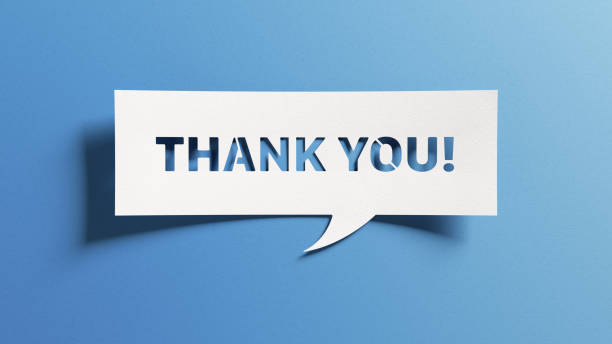